In [1]:
import pandas as pd
import pyodbc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
server = 'LAPTOP-76EGVTT7\SQLEXPRESS'
db = 'project'

In [8]:
conn = pyodbc.connect ('DRIVER= {SQL Server}; SERVER='+server+';DATABASE='+db+ ';UID=Akshay112;PWD=Akshay112; Trusted connection=YES')


In [9]:
sql= "select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.account_id"


In [10]:
df = pd.read_sql(sql, conn)
display(df)

C:\Users\akshay\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,card_id,disp_id,type,issued,account_id,disposition_client_id,disposition_type,client_id,birth_number,district_id,...,balance,k_symbol,bank,account,loan_id,loan_date,loan_amount,duration,payments,status
0,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,300.000000,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
1,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,9900.000000,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
2,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,42599.000000,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
3,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,42658.199219,UROK,None,NaN,5126,1994-07-24,208128,48,4336.0,B
4,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,48117.199219,None,None,NaN,5126,1994-07-24,208128,48,4336.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,94294.000000,None,YZ,45816707.0,7240,1993-09-06,274740,60,4579.0,A
864,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,59294.000000,None,None,NaN,7240,1993-09-06,274740,60,4579.0,A
865,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,59527.101562,UROK,None,NaN,7240,1993-09-06,274740,60,4579.0,A
866,1223,13231,junior,950502 00:00:00,11013,13539,OWNER,13539,780907,63,...,92893.101562,None,None,NaN,7240,1993-09-06,274740,60,4579.0,A


In [12]:
display (df.shape)

(868, 50)

In [13]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id', 'date',
       'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank', 'account',
       'loan_id', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status'],
      dtype='object')

In [14]:
print (df.isnull().sum())

card_id                    0
disp_id                    0
type                       0
issued                     0
account_id                 0
disposition_client_id      0
disposition_type           0
client_id                  0
birth_number               0
district_id                0
A1                         0
A2                         0
A3                         0
A4                         0
A5                         0
A6                         0
A7                         0
A8                         0
A9                         0
A10                        0
A11                        0
A12                        0
A13                        0
A14                        0
A15                        0
A16                        0
order_id                   0
bank_to                    0
account_to                 0
amount                     0
k_symbol                   0
account_date               0
account_district_id        0
frequency                  0
trans_id      

In [15]:
display (df.status.unique())

array(['B', 'A', 'D', 'C'], dtype=object)

In [16]:
display(df.status.value_counts())

A    648
B    168
C     51
D      1
Name: status, dtype: int64

In [17]:
df.status = pd.DataFrame(df.status.map({'A':0, 'B':1, 'C':2, 'D':3}), columns=['status'])
display(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
863    0
864    0
865    0
866    0
867    0
Name: status, Length: 868, dtype: int64

In [18]:
display (df.status.value_counts())

0    648
1    168
2     51
3      1
Name: status, dtype: int64

In [19]:
x = df[['loan_amount', 'duration', 'payments']].values
display(x)

array([[2.08128e+05, 4.80000e+01, 4.33600e+03],
       [2.08128e+05, 4.80000e+01, 4.33600e+03],
       [2.08128e+05, 4.80000e+01, 4.33600e+03],
       ...,
       [2.74740e+05, 6.00000e+01, 4.57900e+03],
       [2.74740e+05, 6.00000e+01, 4.57900e+03],
       [2.74740e+05, 6.00000e+01, 4.57900e+03]])

In [21]:
y = df['status'].values
display(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
x = sc_x.fit_transform(x)
print (x)

[[0.61054106 0.75       0.51752949]
 [0.61054106 0.75       0.51752949]
 [0.61054106 0.75       0.51752949]
 ...
 [0.82071864 1.         0.55733945]
 [0.82071864 1.         0.55733945]
 [0.82071864 1.         0.55733945]]


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=143)
print (x_test.shape)
print (x_train.shape)
print (y_test.shape)
print (y_train.shape)

(261, 3)
(607, 3)
(261,)
(607,)


In [28]:
accuracy=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn=knn.fit(x_train,y_train)
    y_pred =knn.predict(x_train)
    acc= accuracy_score (y_train,y_pred)
    accuracy.append (acc)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [29]:
display (accuracy)

[1.0,
 1.0,
 1.0,
 1.0,
 0.9967051070840197,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495,
 0.9917627677100495]

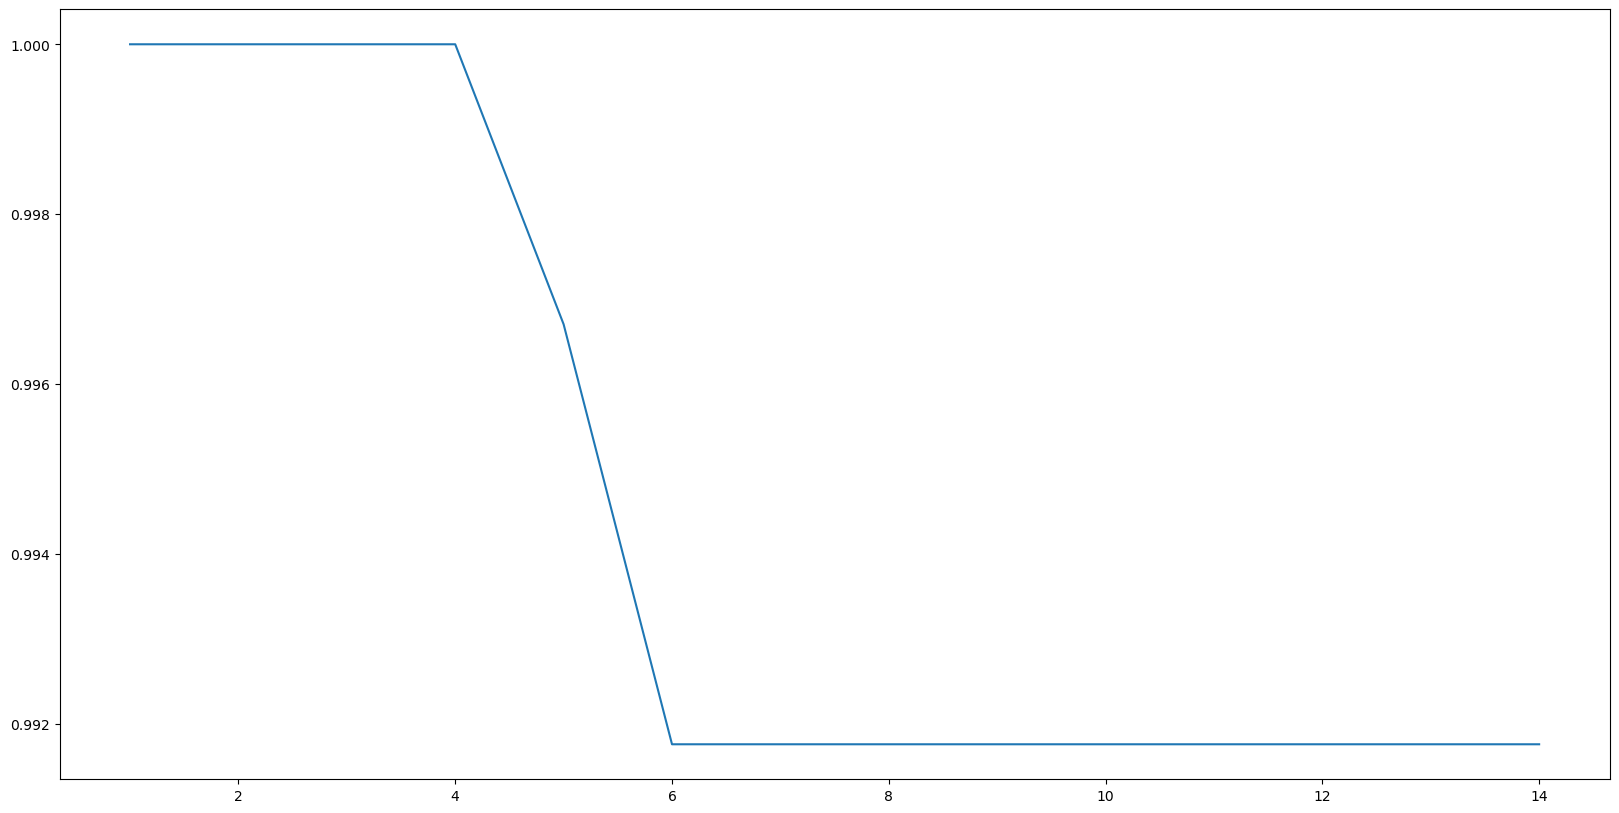

In [30]:
plt.plot(range(1,15),accuracy)
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(x_train, y_train)

In [32]:
y_pred = knn.predict(x_test)
display (accuracy_score(y_pred, y_test))

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9961685823754789

In [33]:
knn = KNeighborsClassifier (n_neighbors=10)
knn = knn.fit(x_train, y_train)
y_pred =  knn.predict (x_test)
display (accuracy_score(y_pred, y_test))

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9961685823754789

In [34]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.74      0.75      0.75       261
weighted avg       0.99      1.00      0.99       261



C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)
print (cm)

[[198   0   0   0]
 [  0  48   0   0]
 [  0   0  14   0]
 [  0   1   0   0]]


In [37]:
from sklearn.tree import DecisionTreeClassifier
TREE = DecisionTreeClassifier (criterion = 'entropy')
TREE.fit(x_train,y_train)
TREE_pred = TREE.predict(x_test)
print (TREE_pred)
print (pd.DataFrame(TREE_pred).groupby(0).agg({0:np.size}))
print('\n Accuracy Score')
print (accuracy_score (y_test,TREE_pred))
print('\nClassification Report')
print(classification_report (y_test,TREE_pred))
print('Confusion Matrix')
print (confusion_matrix (y_test,TREE_pred))

[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 2 1 2 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 2 0 0 0 1 0 0 0 1 1 1 0 0 2 0 2 2 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 2 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 2 0]
     0
0     
0  198
1   48
2   15

 Accuracy Score
0.9961685823754789

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00        48
           2       0.93      1.00      0.97        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.73      0.75      0.74      

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.tree import DecisionTreeClassifier
TREE = DecisionTreeClassifier (criterion= 'gini')
TREE.fit(x_train, y_train)
TREE_pred = TREE.predict(x_test)
print (TREE_pred)
print (pd.DataFrame(TREE_pred).groupby(0).agg({0:np.size}))
print ('\n Accuracy score')
print (accuracy_score(y_test, TREE_pred))
print ('\n classification report')
print (classification_report(y_test, TREE_pred))
print ('\n classification report')
print (classification_report(y_test, TREE_pred))
print ('\n confussion matrix')
print (confusion_matrix(y_test, TREE_pred))

[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 2 1 2 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 2 0 0 0 1 0 0 0 1 1 1 0 0 2 0 2 2 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 2 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 2 0]
     0
0     
0  198
1   48
2   15

 Accuracy score
0.9961685823754789

 classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00        48
           2       0.93      1.00      0.97        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.73      0.75      0.74     

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50, criterion='entropy')
RF.fit(x_train, y_train)
RF_pred = RF.predict(x_test)
print (RF_pred)
print (pd.DataFrame(RF_pred).groupby(0).agg({0:np.size}))
print('\n Accuracy Score')
print (accuracy_score (y_test, RF_pred))
print('\nClassification Report')
print (classification_report(y_test, RF_pred))
print('Confusion Matrix')
print (confusion_matrix(y_test, RF_pred))

[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 2 1 2 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 2 0 0 0 1 0 0 0 1 1 1 0 0 1 0 2 2 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 2 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 2 0]
     0
0     
0  198
1   49
2   14

 Accuracy Score
0.9961685823754789

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         1

    accuracy                           1.00       261
   macro avg       0.74      0.75      0.75      

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit (x_train, y_train)
log_pred = logmodel.predict(x_test)
print (log_pred)
print (pd.DataFrame(log_pred).groupby(0).agg({0 : np.size}))
print('\n Accuracy Score')
print (accuracy_score(y_test, log_pred))
print('\nClassification Report')
print (classification_report(y_test, log_pred))
print('Confusion Matrix')
print (confusion_matrix(y_test, log_pred))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0]
     0
0     
0  213
1   48

 Accuracy Score
0.9348659003831418

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       198
           1       0.98      0.98      0.98        48
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         1

    accuracy                           0.93       261
   macro avg       0.48      0.49      0.48       261
we

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
